<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 527 Homework 2

Add your team member(s) name here.

### Problem 0 (3 points)

## Part 1: The Gradient and its Curl

### Problem 1.1 (Exam Style)

### Problem 1.2 (Exam Style)

## Part 2: Integrating the Gradient 

### Problem 2.1 (Exam-Style)

### Problem 2.2 (Exam Style)

### Problem 2.3

In [151]:
import numpy as np
from PIL import Image
from urllib.request import urlretrieve as retrieve
from os import path as osp
from matplotlib import pyplot as plt
%matplotlib inline


def display_signed_image(f):
    bounds = np.percentile(f, (1, 99))
    d = np.minimum(np.maximum(f, bounds[0]), bounds[1]).astype(float)
    max = np.max(np.abs(bounds))
    d = np.round((d + max) / (2. * max) * 255.).astype(np.uint8)
    print(d.shape)
    plt.imshow(d, cmap='gray')
    plt.axis('off')


base_name, gradient_extension = 'eye', 'tif'
gradient_file_names = ['{}_{}.{}'.format(base_name, d, gradient_extension)
                       for d in ('x', 'y')]

(467, 699)
(466, 700)


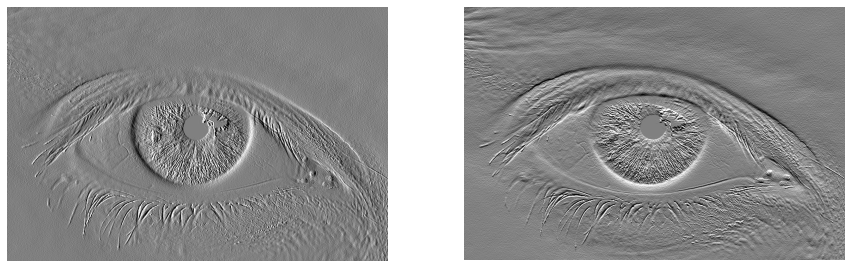

In [152]:
for name in gradient_file_names:
    if not osp.exists(name):
        image_url = 'https://www2.cs.duke.edu/courses/spring21/' + \
                    'compsci527/homework/2/{}'.format(name)
        retrieve(image_url, name)

gradient = [np.array(Image.open(name)) for name in gradient_file_names]
plt.figure(figsize=(15, 6))
for plot, g in enumerate(gradient):
    plt.subplot(1, 2, plot + 1)
    display_signed_image(g)
plt.show()

f_00 = 164

In [153]:
def integrate(g, first_pixel_value=0):  
  g_x, g_y = g[0], g[1]
  I = np.zeros((len(g_x),len(g_y[0])))
  I[0] = g_x.cumsum()[:len(I[0])] + first_pixel_value
  for j in range(len(I[0])):
    I[1:,j] = g_y.cumsum(axis = 0)[:len(I)][:,j] + I[0,j]

  return I

In [154]:
I = integrate(gradient,f_00)

(467, 700)
(467, 700)


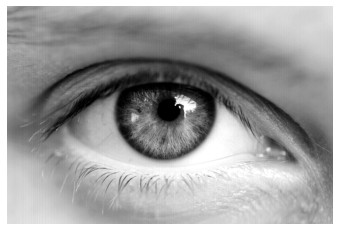

In [155]:
display_signed_image(I)
print(I.shape)

## Part 3: The Laplacian Operator

### Problem 3.1

### Problem 3.2

In [156]:
import scipy.signal as ss


def x_range(sigma):
    k = np.ceil(3. * sigma)
    return np.arange(2 * k + 1) - k


def convolution(f, h, mode='valid'):
    assert f.ndim == h.ndim, 'inputs must have the same number of dimensions'
    g = ss.convolve(f, h, mode=mode, method='direct')
    return g.astype(f.dtype)


def show_plot(p, x=None, figure=True):
    if x is None:
        x = np.arange(len(p))
    if figure:
        plt.figure(figsize=(12, 6))
        plt.subplot()
    ax = plt.gca()
    plt.plot(x, p)
    if figure:
        plt.show()


def compare(fs, xs=None, show=show_plot):
    if xs is None:
        xs = [np.arange(len(f)) for f in fs]
    else:
        assert len(fs) == len(xs), 'inconsistent lists of ordinates and abscissas'
    n = len(fs)
    width = 12
    fig = plt.figure(figsize=(width, width / n))
    for plot, (x, y) in enumerate(zip(xs, fs)):
        if show.__name__ == 'show_mesh':
            fig.add_subplot(1, n, plot + 1, projection='3d')
        else:
            fig.add_subplot(1, n, plot + 1)
        show(y, x=x, figure=False)
    plt.show()



sigma = 3.5
tail, samples = 4 * sigma, 101
fine_x = np.linspace(-tail, tail, samples)

In [157]:
def normalize(kernel, probe):
    #assert kernel.shape == probe.shape
    k = 1 / (convolution(kernel,probe)) ** 0.5
    return k * kernel

def gaussian(sigma, x = None):
    def gauss_in_x(x):
        numerator = -1 * (x.T*x)
        denominator = 2 * (sigma**2)
        return np.exp(numerator/denominator)
    
    if x is None:
        x = x_range(sigma)
        gaussian_kernel = gauss_in_x(x)
        probe = np.flip(gaussian_kernel)
        return normalize(gaussian_kernel, probe), x
    
    else:
        return gauss_in_x(x)

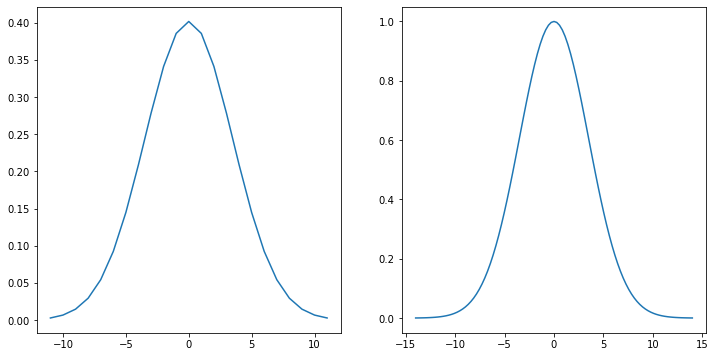

In [158]:
gauss, kernel_x = gaussian(sigma)
fine_gauss = gaussian(sigma, fine_x)
compare((gauss, fine_gauss), xs=(kernel_x, fine_x))

### Problem 3.3 (Exam Style)

### Problem 3.4


[//]: # (Rewrite the expressions here.)
$\ell(x) = -\frac{-x^2+\sigma^2}{\sigma^4}g(x)$ 

$L(x, y) = -\frac{-x^2+\sigma^2}{\sigma^4}G(x,y) + -\frac{-y^2+\sigma^2}{\sigma^4}G(x,y)$

$p(x) = \frac{1}{2}x^2$

$P(x, y) = \frac{1}{4}x^2+\frac{1}{4}y^2$

In [34]:
def show_mesh(f, x=None, figure=True):
    assert f.shape[0] == f.shape[1], 'implemented only for square meshes'
    if x is None:
        x = np.arange(f.shape[0])
    xs, ys = np.meshgrid(x, x)
    if figure:
        plt.figure()
        plt.axes(projection='3d')
    ax = plt.gca()
    ax.plot_wireframe(xs, ys, f, color='gray', linewidths=0.5)
    if figure:
        plt.show()

In [35]:
# laplace_kernel_1d, kernel_x = log(sigma)
# laplace_1d = log(sigma, x=fine_x)
# compare((laplace_kernel_1d, laplace_1d), xs=(kernel_x, fine_x))

# laplace_kernel_2d, kernel_x = log(sigma, dim=2)
# laplace_2d = log(sigma, x=fine_x, dim=2)
# compare((laplace_kernel_2d, laplace_2d), xs=(kernel_x, fine_x), show=show_mesh)

## Part 4: A Simple Edge Detection Method

### Problem 4.1 (Exam Style)

The noise may result in false positives when identifying zero crossings of the LoG output.

### Problem 4.2

In [36]:
david_name = 'david.png'
if not osp.exists(david_name):
    david_url = 'https://www2.cs.duke.edu/courses/spring21/' + \
                    'compsci527/homework/2/{}'.format(david_name)
    retrieve(david_url, david_name)
image = np.array(Image.open(david_name)).astype(float) / 255.


def show_image(img, width=6., figure=True):
    if figure:
        aspect = img.shape[0] / img.shape[1]
        height = width * aspect
        plt.figure(figsize=(width, height))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    if figure:
        plt.show()

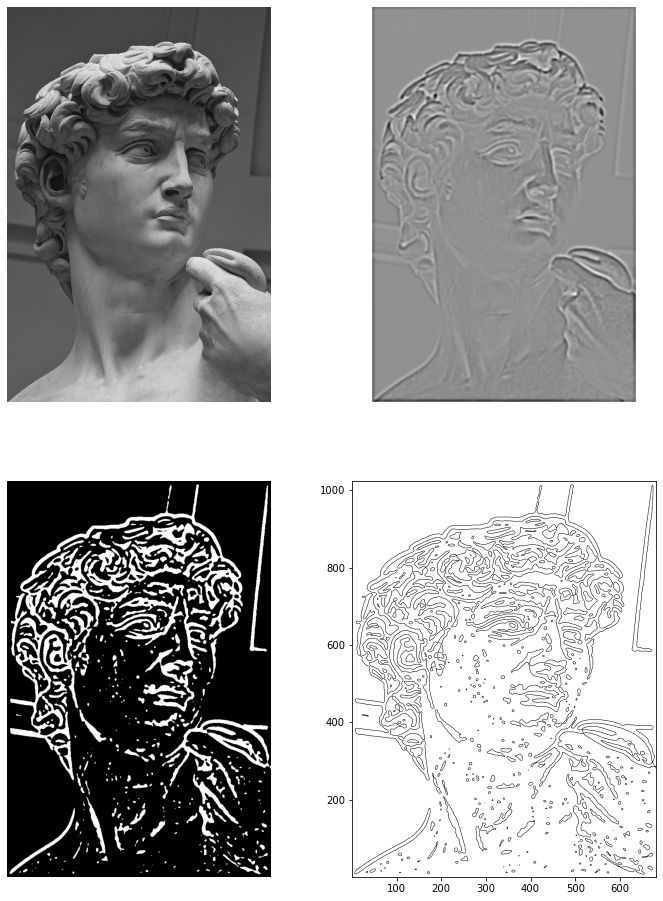

In [174]:
import pickle

laplacian_file = 'laplacian.pkl'
with open(laplacian_file, 'rb') as file:
    laplace_kernel_2d = pickle.load(file)

result = ss.convolve(image, laplace_kernel_2d, mode='same', method='direct')
threshold = np.copy(result)

threshold[threshold>=0] = 1
threshold[threshold<0] = 0



collection = np.array([image, result, threshold, image])
plt.figure(figsize=(12, 16))
for plot, img in enumerate(collection): 
    plt.subplot(2, 2, plot + 1)
    if plot != 3:
        show_image(img, figure=False)
    else:
        plt.contour(result, [0.], origin='image', colors='black', linewidths=0.5)
plt.show()

### Problem 4.3 (Exam Style)

All edges obtained with this method are closed curves because zero crossing separate regions of 1's and 0's in the threshold image. After entering a region of all 0's, we need to exit the region by crossing the threshold again, which results in closed zero-crossing regions.

### Problem 4.4 (Exam Style)

When we look at the edges around David's hair and the right shoulder, the edges are suggested by closed regions formed from zero-crossings. These closed regions are undesirable because they suggest the existence of 2 edges when there is only one from the original picture. This could be remedied if we use a different threshold (instead of 0 crossings) to define the edges. A possible threshold could come from taking the magnitude of the gradient at each pixel.